# 전처리
- 중복데이터 삭제 및  (이전 노트북 : Youtube trending video analysis_self_obtained_dataset 참고)
- Column 이해 및 필요없는 column 삭제
- Categorical variable 가변수(dummy variable) 만들기
- 상수항 결합(bias augmentation)
- 설명변수 & 반응변수 설정
- 학습데이터&평가데이터 분할


In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

In [44]:
Data = pd.read_csv("output/youtube_trending_video_columns_modified.csv")

In [45]:
Data.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,subscriber_count,tag_count,trend_date_diff,appeared_morethanonce,published_trend_diff
0,0,sEoF2oIcjBs,[놀면뭐하니? 예고] 놀면뭐하니를 찾아온 댄스 레전드 비! (feat. 깡),2020-05-14,UCx6jsZ02B4K3SECUrkgPyzg,놀면 뭐하니?,Entertainment,2020-05-16,유재석|김태호|무한도전|유플래시|유산슬|뽕포유|라섹|유르페우스|놀면 뭐하니|놀뭐|무...,1848154,...,8593,https://i.ytimg.com/vi/sEoF2oIcjBs/default.jpg,False,False,[놀면 뭐하니?] 토요일 저녁 6시 30분 방송!,55.70,19,0,0,2
1,1,iK3kwZY6epY,자간을 물리치는 가은｜10화 하이라이트｜신비아파트 고스트볼 더블X : 6개의 예언｜...,2020-05-15,UCoHsxU1eDWHom6D7Fce6kLA,신비아파트 공식 채널,Film & Animation,2020-05-16,신비아파트|신비아파트고스트볼X의탄생|고스트볼X의탄생|고스트볼X|신비아파트두번째이야기...,511896,...,1422,https://i.ytimg.com/vi/iK3kwZY6epY/default.jpg,False,False,신비아파트 고스트볼 더블X : 6개의 예언10화 하이라이트 : 자간을 물리치는 가은...,38.40,39,0,0,2
2,2,atD5O2XCbLw,죄수와 검사Ⅱ(한명숙) ③ 나는 검찰의 개였다 한만호 비망록 단독 입수 - 뉴스타파,2020-05-14,UCeFUGS2VCOb6DO3BiUgvwNA,newstapa,News & Politics,2020-05-16,탐사보도|진실|뉴스타파,273057,...,2199,https://i.ytimg.com/vi/atD5O2XCbLw/default.jpg,False,False,'한명숙 뇌물사건'의 핵심 증인인 한만호 씨의 옥중 비망록을 뉴스타파가 입수했습니다...,53.10,3,0,0,3
3,3,O9e2oZXEKW8,아이유가 포스트말론 맞팔한 이유? 본인등판에서 확인하기🙋 | IU_ eight(에잇...,2020-05-12,UCqq-ovGE01ErlXakPihhKDA,1theK Originals - 원더케이 오리지널,Entertainment,2020-05-16,아이유|아이유 에잇|아이유 신곡|아이유 BTS|슈가|포스트말론 아이유|아이유 본인등...,2188640,...,7115,https://i.ytimg.com/vi/O9e2oZXEKW8/default.jpg,False,False,아이유가 포스트말론 맞팔한 이유? 본인등판에서 확인하기🙋 | IU_ eight(에잇...,NaN,16,0,0,5
4,4,mB9HK4-g27Q,독일 공영방송 도이체벨레(DW) 강경화 외교부 장관 인터뷰 [한글자막 CC /ENG...,2020-05-14,UCwRFj9gC3meixU8fqKJdgxA,"외교부 Ministry of Foreign Affairs, Korea",Nonprofits & Activism,2020-05-16,도이체벨레|독일|공영방송|강경화|외교|외교장관|코로나19|코로나|외교부|강경화장관|...,333869,...,2391,https://i.ytimg.com/vi/mB9HK4-g27Q/default.jpg,False,False,강경화 외교부 장관이 독일 공영방송 도이체벨레(DW)와 인터뷰(2020.5.14.)...,8.07,16,0,0,5


In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 22 columns):
Unnamed: 0               559 non-null int64
video_id                 559 non-null object
title                    559 non-null object
publishedAt              559 non-null object
channelId                559 non-null object
channelTitle             559 non-null object
categoryId               297 non-null object
trending_date            559 non-null object
tags                     559 non-null object
view_count               559 non-null int64
likes                    559 non-null int64
dislikes                 559 non-null int64
comment_count            559 non-null int64
thumbnail_link           559 non-null object
comments_disabled        559 non-null bool
ratings_disabled         559 non-null bool
description              544 non-null object
subscriber_count         513 non-null float64
tag_count                559 non-null int64
trend_date_diff          559 non-null int64
appea

In [47]:
Data.isnull().sum()

Unnamed: 0                 0
video_id                   0
title                      0
publishedAt                0
channelId                  0
channelTitle               0
categoryId               262
trending_date              0
tags                       0
view_count                 0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
description               15
subscriber_count          46
tag_count                  0
trend_date_diff            0
appeared_morethanonce      0
published_trend_diff       0
dtype: int64

In [48]:
#구독자수가 missing 인 row제거하기
Data = Data[Data['subscriber_count'].isnull() == False]
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 558
Data columns (total 22 columns):
Unnamed: 0               513 non-null int64
video_id                 513 non-null object
title                    513 non-null object
publishedAt              513 non-null object
channelId                513 non-null object
channelTitle             513 non-null object
categoryId               277 non-null object
trending_date            513 non-null object
tags                     513 non-null object
view_count               513 non-null int64
likes                    513 non-null int64
dislikes                 513 non-null int64
comment_count            513 non-null int64
thumbnail_link           513 non-null object
comments_disabled        513 non-null bool
ratings_disabled         513 non-null bool
description              500 non-null object
subscriber_count         513 non-null float64
tag_count                513 non-null int64
trend_date_diff          513 non-null int64
appea

### Explanatory variable 이 될 column추리기 
- Response variable: view_count
- video_id, title, publishedAt, channelId, channelTitle, publishedAt, trending_date, tags, thumbnail_link, ratings_disabled, description, trend_date_diff 컬럼들 제거

In [49]:
Data = Data.drop(columns = ['Unnamed: 0','video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'publishedAt', 'trending_date', 'tags', 'thumbnail_link', 'ratings_disabled', 'description','trend_date_diff'])

### Categorical Variable(범주형변수) indicator variable(가변수) 로 변환하여 추가 
- categoryId, published_trend_diff

In [50]:
#가변수 생성
categoryId = pd.get_dummies(Data['categoryId'],prefix = 'category')
published_trend_diff = pd.get_dummies(Data['published_trend_diff'],prefix = 'published_trend_diff')

#원래 변수 제거
Data = Data.drop(columns=['categoryId','published_trend_diff'])
#Concatenation
Data = pd.concat([Data, categoryId, published_trend_diff], axis=1)

In [51]:
Data.columns

Index(['view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'subscriber_count', 'tag_count', 'appeared_morethanonce',
       'category_Comedy', 'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activism', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Sports', 'category_Travel & Events', 'published_trend_diff_0',
       'published_trend_diff_1', 'published_trend_diff_2',
       'published_trend_diff_3', 'published_trend_diff_4',
       'published_trend_diff_5', 'published_trend_diff_6',
       'published_trend_diff_7', 'published_trend_diff_8'],
      dtype='object')

### Bias augmentation (상수항 결합)

In [52]:
Data = sm.add_constant(Data, has_constant = 'add')
Data.head()

,const,view_count,likes,dislikes,comment_count,comments_disabled,subscriber_count,tag_count,appeared_morethanonce,category_Comedy,...,category_Travel & Events,published_trend_diff_0,published_trend_diff_1,published_trend_diff_2,published_trend_diff_3,published_trend_diff_4,published_trend_diff_5,published_trend_diff_6,published_trend_diff_7,published_trend_diff_8
0,1.0,1848154,25886,606,8593,False,55.70,19,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,511896,5627,360,1422,False,38.40,39,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,273057,18416,394,2199,False,53.10,3,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,333869,12179,425,2391,False,8.07,16,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1.0,1316545,22305,337,8687,False,84.00,23,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
Data = Data.astype(float)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 558
Data columns (total 32 columns):
const                             513 non-null float64
view_count                        513 non-null float64
likes                             513 non-null float64
dislikes                          513 non-null float64
comment_count                     513 non-null float64
comments_disabled                 513 non-null float64
subscriber_count                  513 non-null float64
tag_count                         513 non-null float64
appeared_morethanonce             513 non-null float64
category_Comedy                   513 non-null float64
category_Education                513 non-null float64
category_Entertainment            513 non-null float64
category_Film & Animation         513 non-null float64
category_Gaming                   513 non-null float64
category_Howto & Style            513 non-null float64
category_Music                    513 non-null float64
category_News &

### 설명변수(X), 반응변수(Y) 분리 및 학습데이터(train) 와 평가데이터(test) 분할

In [54]:
feature_columns = list(Data.columns.difference(['view_count']))
X = Data[feature_columns]
y = Data.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(359, 31) (154, 31) (359,) (154,)


# 회귀분석 모델링 (OLS,다중선형회귀)
- 모델 fitting (full model)
- R2나 p-value 보기
- Correlation matrix, 산점도, VIF 를 통한 다중공산성 확인을 통한 ‘제거할 필요가 있는 변수’ 판단 
- residual pattern 확인
- qqplot 으로 정규분포를 따르는지 확인
- 잔차 plot (validation data 에 대한 MSE성능확인)


In [55]:
# Train the Data / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [56]:
fitted_full_model.summary()
#R2 = 0.654


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     38.14
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           4.04e-85
Time:                        10:37:18   Log-Likelihood:                -5144.2
No. Observations:                 359   AIC:                         1.034e+04
Df Residuals:                     331   BIC:                         1.045e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce           1.507e+04   5.02e+04      0.300      0.764   -8.36e+04    1.14e+05
category_Comedy                -1.486e+05   1.27e+05     -1.174      0.241   -3.98e+05       1e+05
category_Education             -7.845e+04   1.94e+05     -0.404      0.687   -4.61e+05    3.04e+05
category_Entertainment          2.377e+05   6.95e+04      3.421      0.001    1.01e+05    3.74e+05
category_Film & Animation       3.584e+05   1.77e+05      2.020      0.044    9306.400    7.07e+05
category_Gaming                 5.616e+05   1.69e+05      3.329      0.001     2.3e+05    8.93e+05
category_Howto & Style          1.728e+05   2.15e+05      0.802      0.423   -2.51e+05    5.96e+05
category_Music                  4.274e+04   9.41e+04      0.454      0.650   -1.42e+05    2.28e+05
category_News & Politics        8.723e+04   8.53e+04      1.023      0.307   -8.05e+04    2.55e+05
category_Nonprofits & Activism   8.08e+04   3.11e+05      0.259      0.795   -5.32e+05    6.94e+05
category_People & Blogs          6.25e+04    1.2e+05      0.523      0.601   -1.73e+05    2.98e+05
category_Pets & Animals         1.951e+05   1.79e+05      1.088      0.277   -1.58e+05    5.48e+05
category_Science & Technology   1.468e-10   1.01e-10      1.451      0.148   -5.22e-11    3.46e-10
category_Sports                 6.588e+04   2.18e+05      0.302      0.763   -3.63e+05    4.95e+05
category_Travel & Events        1.381e+05   3.06e+05      0.451      0.652   -4.65e+05    7.41e+05
comment_count                    108.0124     13.827      7.812      0.000      80.812     135.212
comments_disabled              -7.782e+05   3.45e+05     -2.254      0.025   -1.46e+06   -9.89e+04
const                          -3.862e+04   7.38e+04     -0.523      0.601   -1.84e+05    1.07e+05
dislikes                         424.6212     41.383     10.261      0.000     343.213     506.029
likes                             -0.3541      0.914     -0.387      0.699      -2.152       1.443
published_trend_diff_0         -5.806e+04   8.66e+04     -0.671      0.503   -2.28e+05    1.12e+05
published_trend_diff_1          6.687e+04    6.8e+04      0.984      0.326   -6.68e+04    2.01e+05
published_trend_diff_2          1.321e+05   7.28e+04      1.815      0.070   -1.11e+04    2.75e+05
published_trend_diff_3         -4.489e+04   8.36e+04     -0.537      0.592   -2.09e+05     1.2e+05
published_trend_diff_4         -4488.6966   9.76e+04     -0.046      0.963   -1.96e+05    1.87e+05
published_trend_diff_5         -1.623e+05   1.31e+05     -1.239      0.216    -4.2e+05    9.55e+04
published_trend_diff_6         -3.098e+04      2e+05     -0.155      0.877   -4.24e+05    3.62e+05
published_trend_diff_7          -2.58e-12   4.45e-12     -0.580      0.562   -1.13e-11    6.17e-12
published_tren

### Logarithmic Transformation

In [57]:
Data_log=Data
Data_log['view_count'] = np.log(Data_log['view_count'])

In [58]:
feature_columns = list(Data_log.columns.difference(['view_count']))
X = Data_log[feature_columns]
y = Data_log.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

full_log_model = sm.OLS(train_y, train_x)
fitted_full_log_model = full_log_model.fit()

(359, 31) (154, 31) (359,) (154,)


In [59]:
fitted_full_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     10.44
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.83e-30
Time:                        10:37:23   Log-Likelihood:                -450.18
No. Observations:                 359   AIC:                             956.4
Df Residuals:                     331   BIC:                             1065.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce             -0.1836      0.106     -1.735      0.084      -0.392       0.025
category_Comedy                    0.4039      0.274      1.473      0.142      -0.135       0.943
category_Education                -0.0611      0.376     -0.162      0.871      -0.802       0.679
category_Entertainment             0.4493      0.148      3.038      0.003       0.158       0.740
category_Film & Animation          0.7164      0.309      2.319      0.021       0.109       1.324
category_Gaming                    0.1809      0.365      0.496      0.620      -0.537       0.898
category_Howto & Style             0.8296      0.406      2.043      0.042       0.031       1.629
category_Music                     0.2341      0.215      1.087      0.278      -0.190       0.658
category_News & Politics           0.4407      0.164      2.695      0.007       0.119       0.762
category_Nonprofits & Activism     0.6261      0.926      0.676      0.500      -1.196       2.448
category_People & Blogs            0.2728      0.227      1.204      0.229      -0.173       0.718
category_Pets & Animals            0.4110      0.313      1.314      0.190      -0.204       1.026
category_Science & Technology  -4.465e-16   3.19e-16     -1.400      0.163   -1.07e-15    1.81e-16
category_Sports                    0.0962      0.456      0.211      0.833      -0.801       0.993
category_Travel & Events           0.2644      0.642      0.412      0.681      -0.999       1.527
comment_count                      0.0002   2.38e-05      7.360      0.000       0.000       0.000
comments_disabled                  0.5379      0.714      0.754      0.452      -0.866       1.942
const                             10.2490      0.133     77.101      0.000       9.987      10.510
dislikes                           0.0002   8.41e-05      2.840      0.005    7.33e-05       0.000
likes                          -7.124e-06   1.57e-06     -4.533      0.000   -1.02e-05   -4.03e-06
published_trend_diff_0             1.3300      0.172      7.738      0.000       0.992       1.668
published_trend_diff_1             1.3985      0.120     11.692      0.000       1.163       1.634
published_trend_diff_2             1.4240      0.132     10.786      0.000       1.164       1.684
published_trend_diff_3             1.2763      0.163      7.844      0.000       0.956       1.596
published_trend_diff_4             1.5712      0.187      8.384      0.000       1.203       1.940
published_trend_diff_5             1.3149      0.251      5.246      0.000       0.822       1.808
published_trend_diff_6             1.6086      0.413      3.893      0.000       0.796       2.421
published_trend_diff_7             0.3253      0.570      0.570      0.569      -0.797       1.447
published_tren

### root transformation 

In [19]:
Data_root=Data
Data_root['view_count'] = np.sqrt(Data_log['view_count'])

In [20]:
feature_columns = list(Data_root.columns.difference(['view_count']))
X = Data_root[feature_columns]
y = Data_root.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

full_root_model = sm.OLS(train_y, train_x)
fitted_full_root_model = full_root_model.fit()

(359, 31) (154, 31) (359,) (154,)


In [22]:
fitted_full_root_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     8.896
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.85e-25
Time:                        10:34:54   Log-Likelihood:                 236.81
No. Observations:                 359   AIC:                            -419.6
Df Residuals:                     332   BIC:                            -314.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce             -0.0243      0.015     -1.588      0.113      -0.054       0.006
category_Comedy                    0.0909      0.038      2.411      0.016       0.017       0.165
category_Education                 0.0221      0.055      0.403      0.687      -0.086       0.130
category_Entertainment             0.0646      0.022      2.982      0.003       0.022       0.107
category_Film & Animation          0.1406      0.051      2.756      0.006       0.040       0.241
category_Gaming                    0.0464      0.049      0.950      0.343      -0.050       0.142
category_Howto & Style             0.0725      0.059      1.222      0.223      -0.044       0.189
category_Music                     0.0083      0.030      0.273      0.785      -0.051       0.068
category_News & Politics           0.0701      0.026      2.646      0.009       0.018       0.122
category_Nonprofits & Activism -1.795e-17   2.38e-16     -0.076      0.940   -4.86e-16     4.5e-16
category_People & Blogs            0.0589      0.037      1.595      0.112      -0.014       0.132
category_Pets & Animals            0.0791      0.046      1.709      0.088      -0.012       0.170
category_Science & Technology     -0.0511      0.093     -0.548      0.584      -0.234       0.132
category_Sports                   -0.0138      0.067     -0.208      0.835      -0.145       0.117
category_Travel & Events         2.33e-16   5.99e-17      3.891      0.000    1.15e-16    3.51e-16
comment_count                   2.007e-05   3.91e-06      5.128      0.000    1.24e-05    2.78e-05
comments_disabled                  0.0667      0.148      0.450      0.653      -0.225       0.359
const                              3.0420      0.020    154.734      0.000       3.003       3.081
dislikes                        3.695e-05   1.25e-05      2.948      0.003    1.23e-05    6.16e-05
likes                          -6.904e-07   2.57e-07     -2.687      0.008    -1.2e-06   -1.85e-07
published_trend_diff_0             0.3656      0.024     14.925      0.000       0.317       0.414
published_trend_diff_1             0.3788      0.018     21.523      0.000       0.344       0.413
published_trend_diff_2             0.3575      0.020     17.829      0.000       0.318       0.397
published_trend_diff_3             0.3734      0.025     15.213      0.000       0.325       0.422
published_trend_diff_4             0.4227      0.029     14.635      0.000       0.366       0.480
published_trend_diff_5             0.3648      0.034     10.813      0.000       0.298       0.431
published_trend_diff_6             0.4136      0.061      6.824      0.000       0.294       0.533
published_trend_diff_7             0.3655      0.084      4.366      0.000       0.201       0.530
published_tren

### Pairwise scatter plot

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001A835D26E58> (for post_execute):


KeyboardInterrupt: 

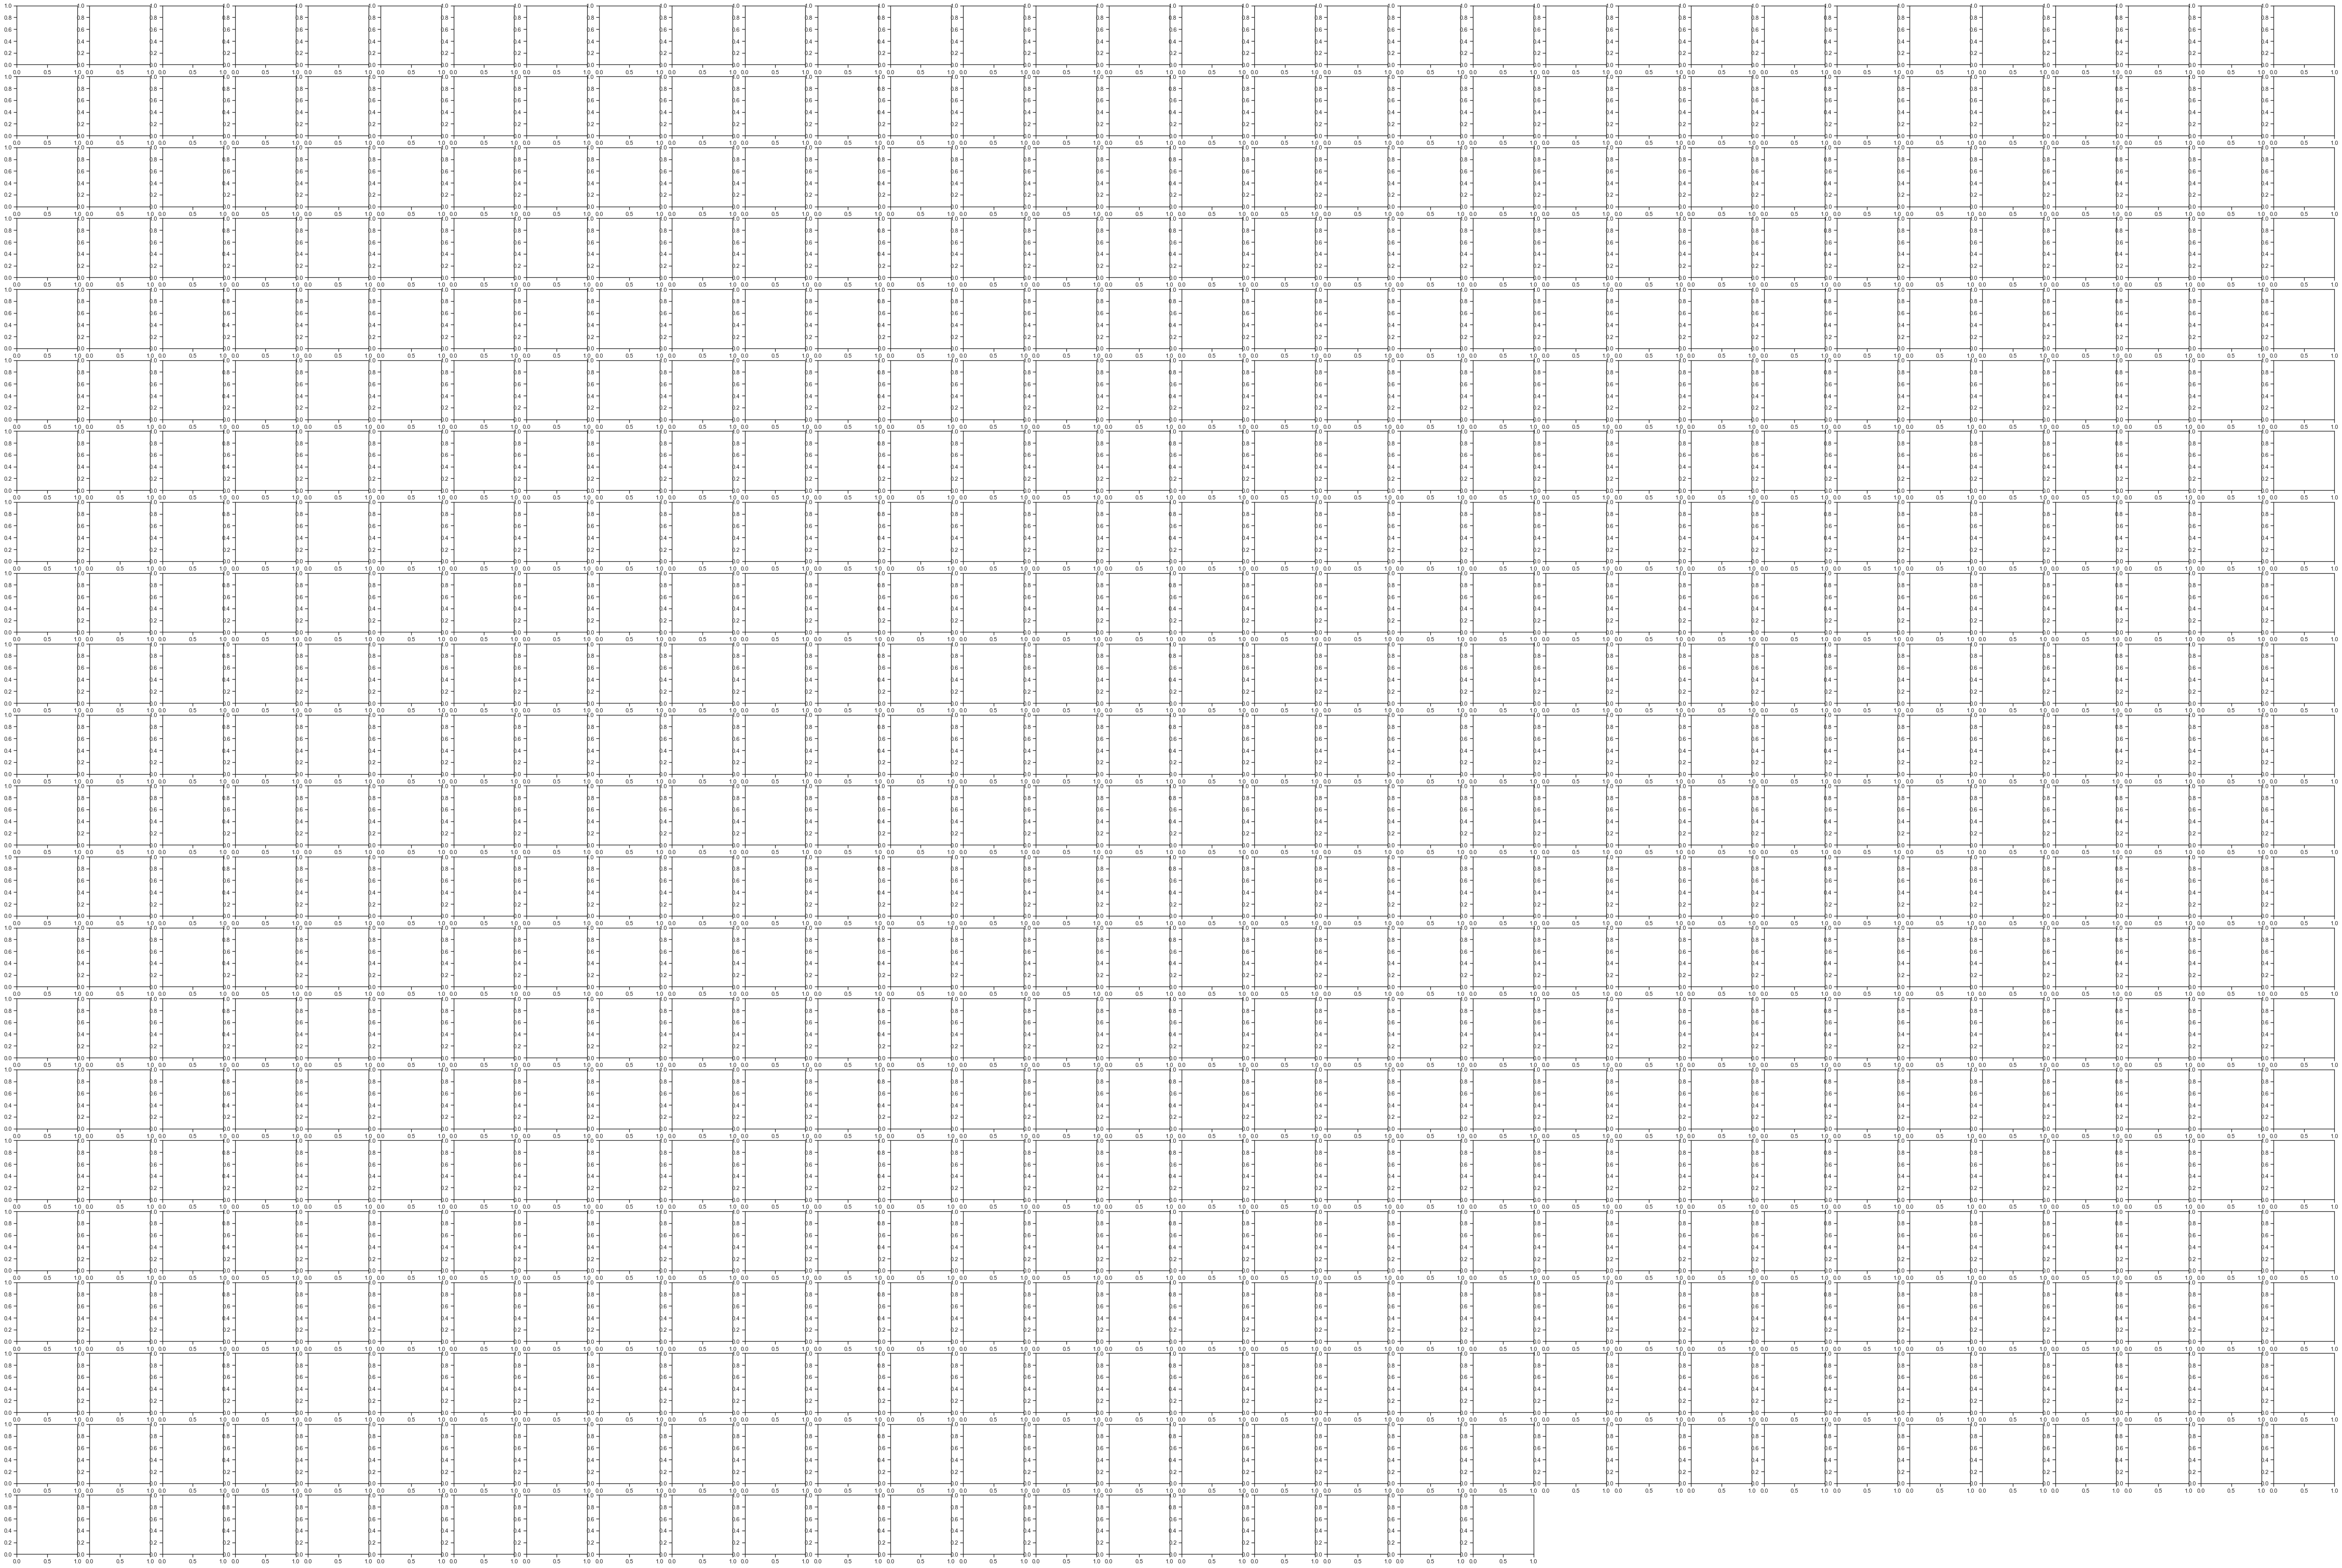

In [21]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(Data)